# Modeling

In [35]:
#imports 

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [5]:
df = pd.read_csv("../data/cleaned_df.csv")
df = df.drop(columns="Unnamed: 0")
df.head()

,post_id,selftext,subreddit,is_osr
0,1irnln3,HeroQuest is the perfect entry into OSR DND. ...,osr,1
1,1f3scds,"To be clear, it was a lot of work before the g...",osr,1
2,1di0qn6,"So, I know there was a thread discussing peopl...",osr,1
3,1g5ga0h,Really loving the booklet layout. Open up char...,osr,1
4,1grfhij,In this video I discuss why I consider Castles...,osr,1


game          1936
https         1482
like          1370
just          1238
players       1178
com           1126
ve             852
play           826
games          807
time           727
rpg            670
new            669
character      662
people         660
want           658
rules          648
don            624
know           611
make           609
www            605
really         604
https www      582
osr            568
think          509
player         496
good           471
5e             464
campaign       463
gm             460
way            458
things         454
run            452
world          432
use            426
group          411
playing        411
fun            392
characters     389
dungeon        374
adventure      369
systems        362
feel           358
book           346
lot            343
old            330
table          330
ll             329
fantasy        325
got            312
need           311
dtype: int64

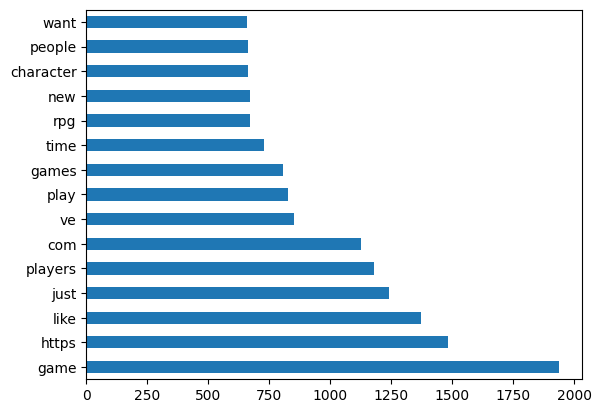

In [7]:
X = df["selftext"]

y = df["is_osr"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state=123) 

cvec = CountVectorizer(
    stop_words="english",
    ngram_range=(1,2),
    min_df=25,
    max_features=100
)

X_train_cv = cvec.fit_transform(X_train)
X_test_cv = cvec.transform(X_test)

X_train_df_rpg = pd.DataFrame(
    X_train_cv.toarray(), 
    columns=cvec.get_feature_names_out()
)

X_train_df_rpg.sum().sort_values(ascending = False).head(15).plot(kind='barh');
X_train_df_rpg.sum().sort_values(ascending = False).head(50)

## Model 1: Multinomial Naive Baye's

# put new stop word list and stemmer/lemmatizing in

In [8]:
#put a different stop word list in
pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("model", MultinomialNB())
])

In [29]:
#1
pipe_params = {
    'cvec__max_features': [500, 3000, 3800, 1000],
    'cvec__min_df': [20, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(
    pipe, # the thing to gridsearch over
    param_grid=pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

In [30]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.8, 0.88, 0.85],
                         'cvec__max_features': [3000, 3100],
                         'cvec__min_df': [100, 30, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [31]:
gs.best_params_

{'cvec__max_df': 0.88,
 'cvec__max_features': 3000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

In [32]:
# Score model on training set.
gs.score(X_train, y_train)

0.8587537091988131

In [33]:
# Score model on testing set.
gs.score(X_test, y_test)

0.7846975088967971

In [34]:
# 2
pipe_params = {
    'cvec__max_features': [500, 3000, 3800, 1000],
    'cvec__min_df': [20, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
# Instantiate GridSearchCV.
gs = GridSearchCV(
    pipe, # the thing to gridsearch over
    param_grid=pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

gs.fit(X_train, y_train)

print(f"best params: {gs.best_params_}")
# Score model on training set.
print(f"train score:{gs.score(X_train, y_train)}")
# Score model on testing set.
print(f"train score:{gs.score(X_test, y_test)}")

best params: {'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1)}
train score:0.8587537091988131
train score:0.7829181494661922


In [ ]:
# 3 
pipe_params = {
    'cvec__max_features': [3000, 3100, 2800],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [0.9, 0.95, 0.8],
    'cvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(
    pipe, # the thing to gridsearch over
    param_grid=pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

gs.fit(X_train, y_train)

print(f"best params: {gs.best_params_}")
# Score model on training set.
print(f"train score:{gs.score(X_train, y_train)}")
# Score model on testing set.
print(f"train score:{gs.score(X_test, y_test)}")

In [ ]:
#4
pipe_params = {
    'cvec__max_features': [3000, 3100],
    'cvec__min_df': [100, 30, 3],
    'cvec__max_df': [0.80, 0.88, 0.85],
    'cvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(
    pipe, # the thing to gridsearch over
    param_grid=pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

gs.fit(X_train, y_train)

print(f"best params: {gs.best_params_}")
# Score model on training set.
print(f"train score:{gs.score(X_train, y_train)}")
# Score model on testing set.
print(f"train score:{gs.score(X_test, y_test)}")

In [ ]:
cross_val_score(pipe, X_train, y_train, cv=3).mean() 

## Model 2: random forest

In [41]:
f_pipe = Pipeline([
    ("cvec", CountVectorizer()),
    ("model", RandomForestClassifier())
])

In [42]:
f_pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()), ('model', RandomForestClassifier())],
 'transform_input': None,
 'verbose': False,
 'cvec': CountVectorizer(),
 'model': RandomForestClassifier(),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_sam

### Super overfit, but without setting max_depth, that's not surprising

In [43]:
f_pipe_params = {
    'cvec__max_features': [3000, 3100],
    'cvec__min_df': [100, 30, 3],
    'cvec__max_df': [0.80, 0.88, 0.85],
    'cvec__ngram_range': [(1,1), (1,2)]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(
    f_pipe, # the thing to gridsearch over
    param_grid=f_pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

gs.fit(X_train, y_train)

print(f"best params: {gs.best_params_}")
# Score model on training set.
print(f"train score:{gs.score(X_train, y_train)}")
# Score model on testing set.
print(f"train score:{gs.score(X_test, y_test)}")

best params: {'cvec__max_df': 0.8, 'cvec__max_features': 3100, 'cvec__min_df': 30, 'cvec__ngram_range': (1, 2)}
train score:0.9994065281899109
train score:0.7829181494661922


### Second iteration added max depth. Trained model performed worse than the previous one, but that's expected. Still overfit, but nearly so much. Let's tweak max_depth again 

In [45]:
#2
f_pipe_params = {
    'cvec__max_features': [3100, 3000],
    'cvec__min_df': [30, 50],
    'cvec__max_df': [0.70, 0.80],
    'cvec__ngram_range': [(1,3), (1,2)],
     'model__max_depth': [3, 4]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(
    f_pipe, # the thing to gridsearch over
    param_grid=f_pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

gs.fit(X_train, y_train)

print(f"best params: {gs.best_params_}")
# Score model on training set.
print(f"train score:{gs.score(X_train, y_train)}")
# Score model on testing set.
print(f"train score:{gs.score(X_test, y_test)}")

best params: {'cvec__max_df': 0.8, 'cvec__max_features': 3100, 'cvec__min_df': 30, 'cvec__ngram_range': (1, 3), 'model__max_depth': 4}
train score:0.7786350148367952
train score:0.7313167259786477


In [46]:
#3
f_pipe_params = {
    'cvec__max_features': [3100, 4000],
    'cvec__min_df': [30, 20],
    'cvec__max_df': [0.80, 0.90],
    'cvec__ngram_range': [(1,3)],
     'model__max_depth': [4, 5]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(
    f_pipe, # the thing to gridsearch over
    param_grid=f_pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

gs.fit(X_train, y_train)

print(f"best params: {gs.best_params_}")
# Score model on training set.
print(f"train score:{gs.score(X_train, y_train)}")
# Score model on testing set.
print(f"train score:{gs.score(X_test, y_test)}")

best params: {'cvec__max_df': 0.8, 'cvec__max_features': 3100, 'cvec__min_df': 20, 'cvec__ngram_range': (1, 3), 'model__max_depth': 5}
train score:0.8118694362017804
train score:0.7633451957295374


## even less overfit

In [ ]:
#4
f_pipe_params = {
    'cvec__max_features': [3100, 2800],
    'cvec__min_df': [25, 20],
    'cvec__max_df': [0.80, 0.90],
    'cvec__ngram_range': [(1,3)],
     'model__max_depth': [6, 5]
}

# Instantiate GridSearchCV.
gs = GridSearchCV(
    f_pipe, # the thing to gridsearch over
    param_grid=f_pipe_params, # the hyperparameters to check
    cv=5 # 5-fold cross-validation
)

gs.fit(X_train, y_train)

print(f"best params: {gs.best_params_}")
# Score model on training set.
print(f"train score:{gs.score(X_train, y_train)}")
# Score model on testing set.
print(f"train score:{gs.score(X_test, y_test)}")